In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm
from matplotlib.colors import Normalize

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

import celeri

plt.rcParams["text.usetex"] = False

# Read model and create default plotting parameters


In [2]:
# Read in model run
run_folder = celeri.get_newest_run_folder()
estimation = celeri.read_run(run_folder)

# Get a default plotting parameter dataclass
p = celeri.get_default_plotting_options(estimation.model.config, estimation, estimation.model.station)

# Load geographic boundaries

In [3]:
world_boundaries = sio.loadmat("WorldHiVectors.mat")
geographic_lons = world_boundaries["lon"]
geographic_lats = world_boundaries["lat"]

# Plot basic model inputs

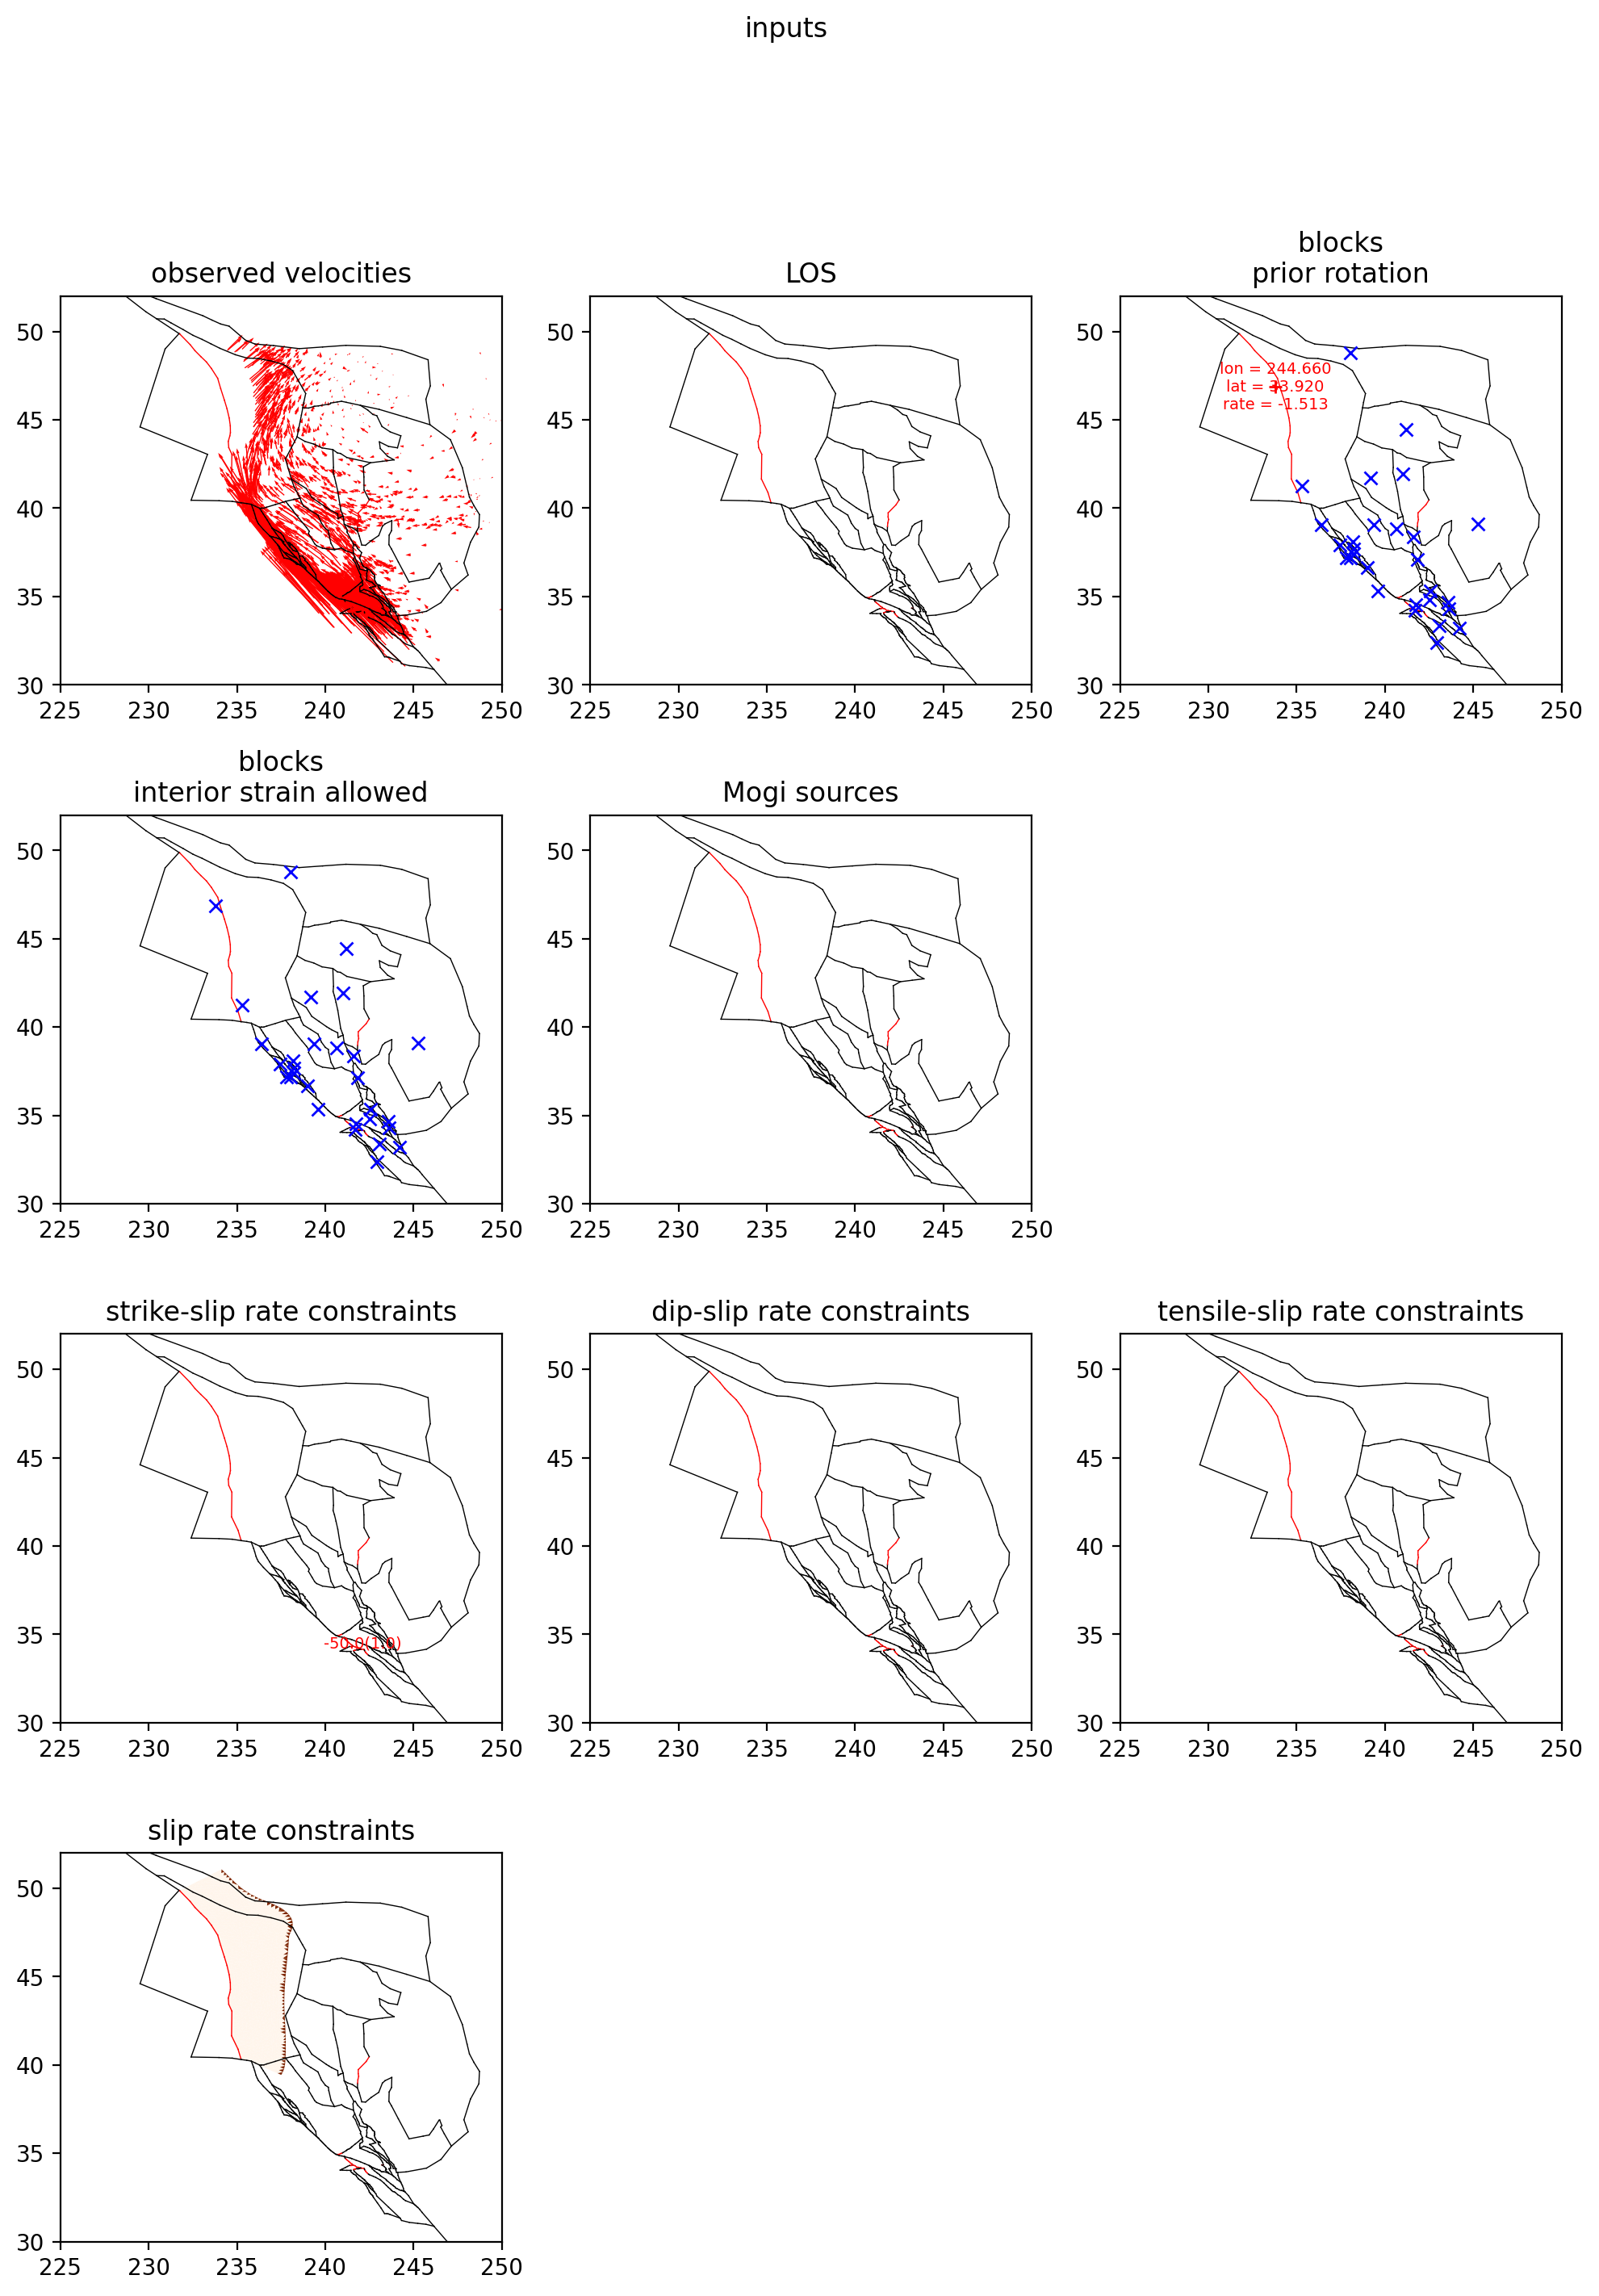

2025-07-15 16:24:24.101 | SUCCESS  | celeri.plot:plot_input_summary:359 - Wrote figures /Users/meade/Desktop/celeri/runs/0000000006/plot_input_summary.(pdf, png)


<Figure size 640x480 with 0 Axes>

In [4]:
celeri.plot_input_summary(estimation.model)

# Plot model summary


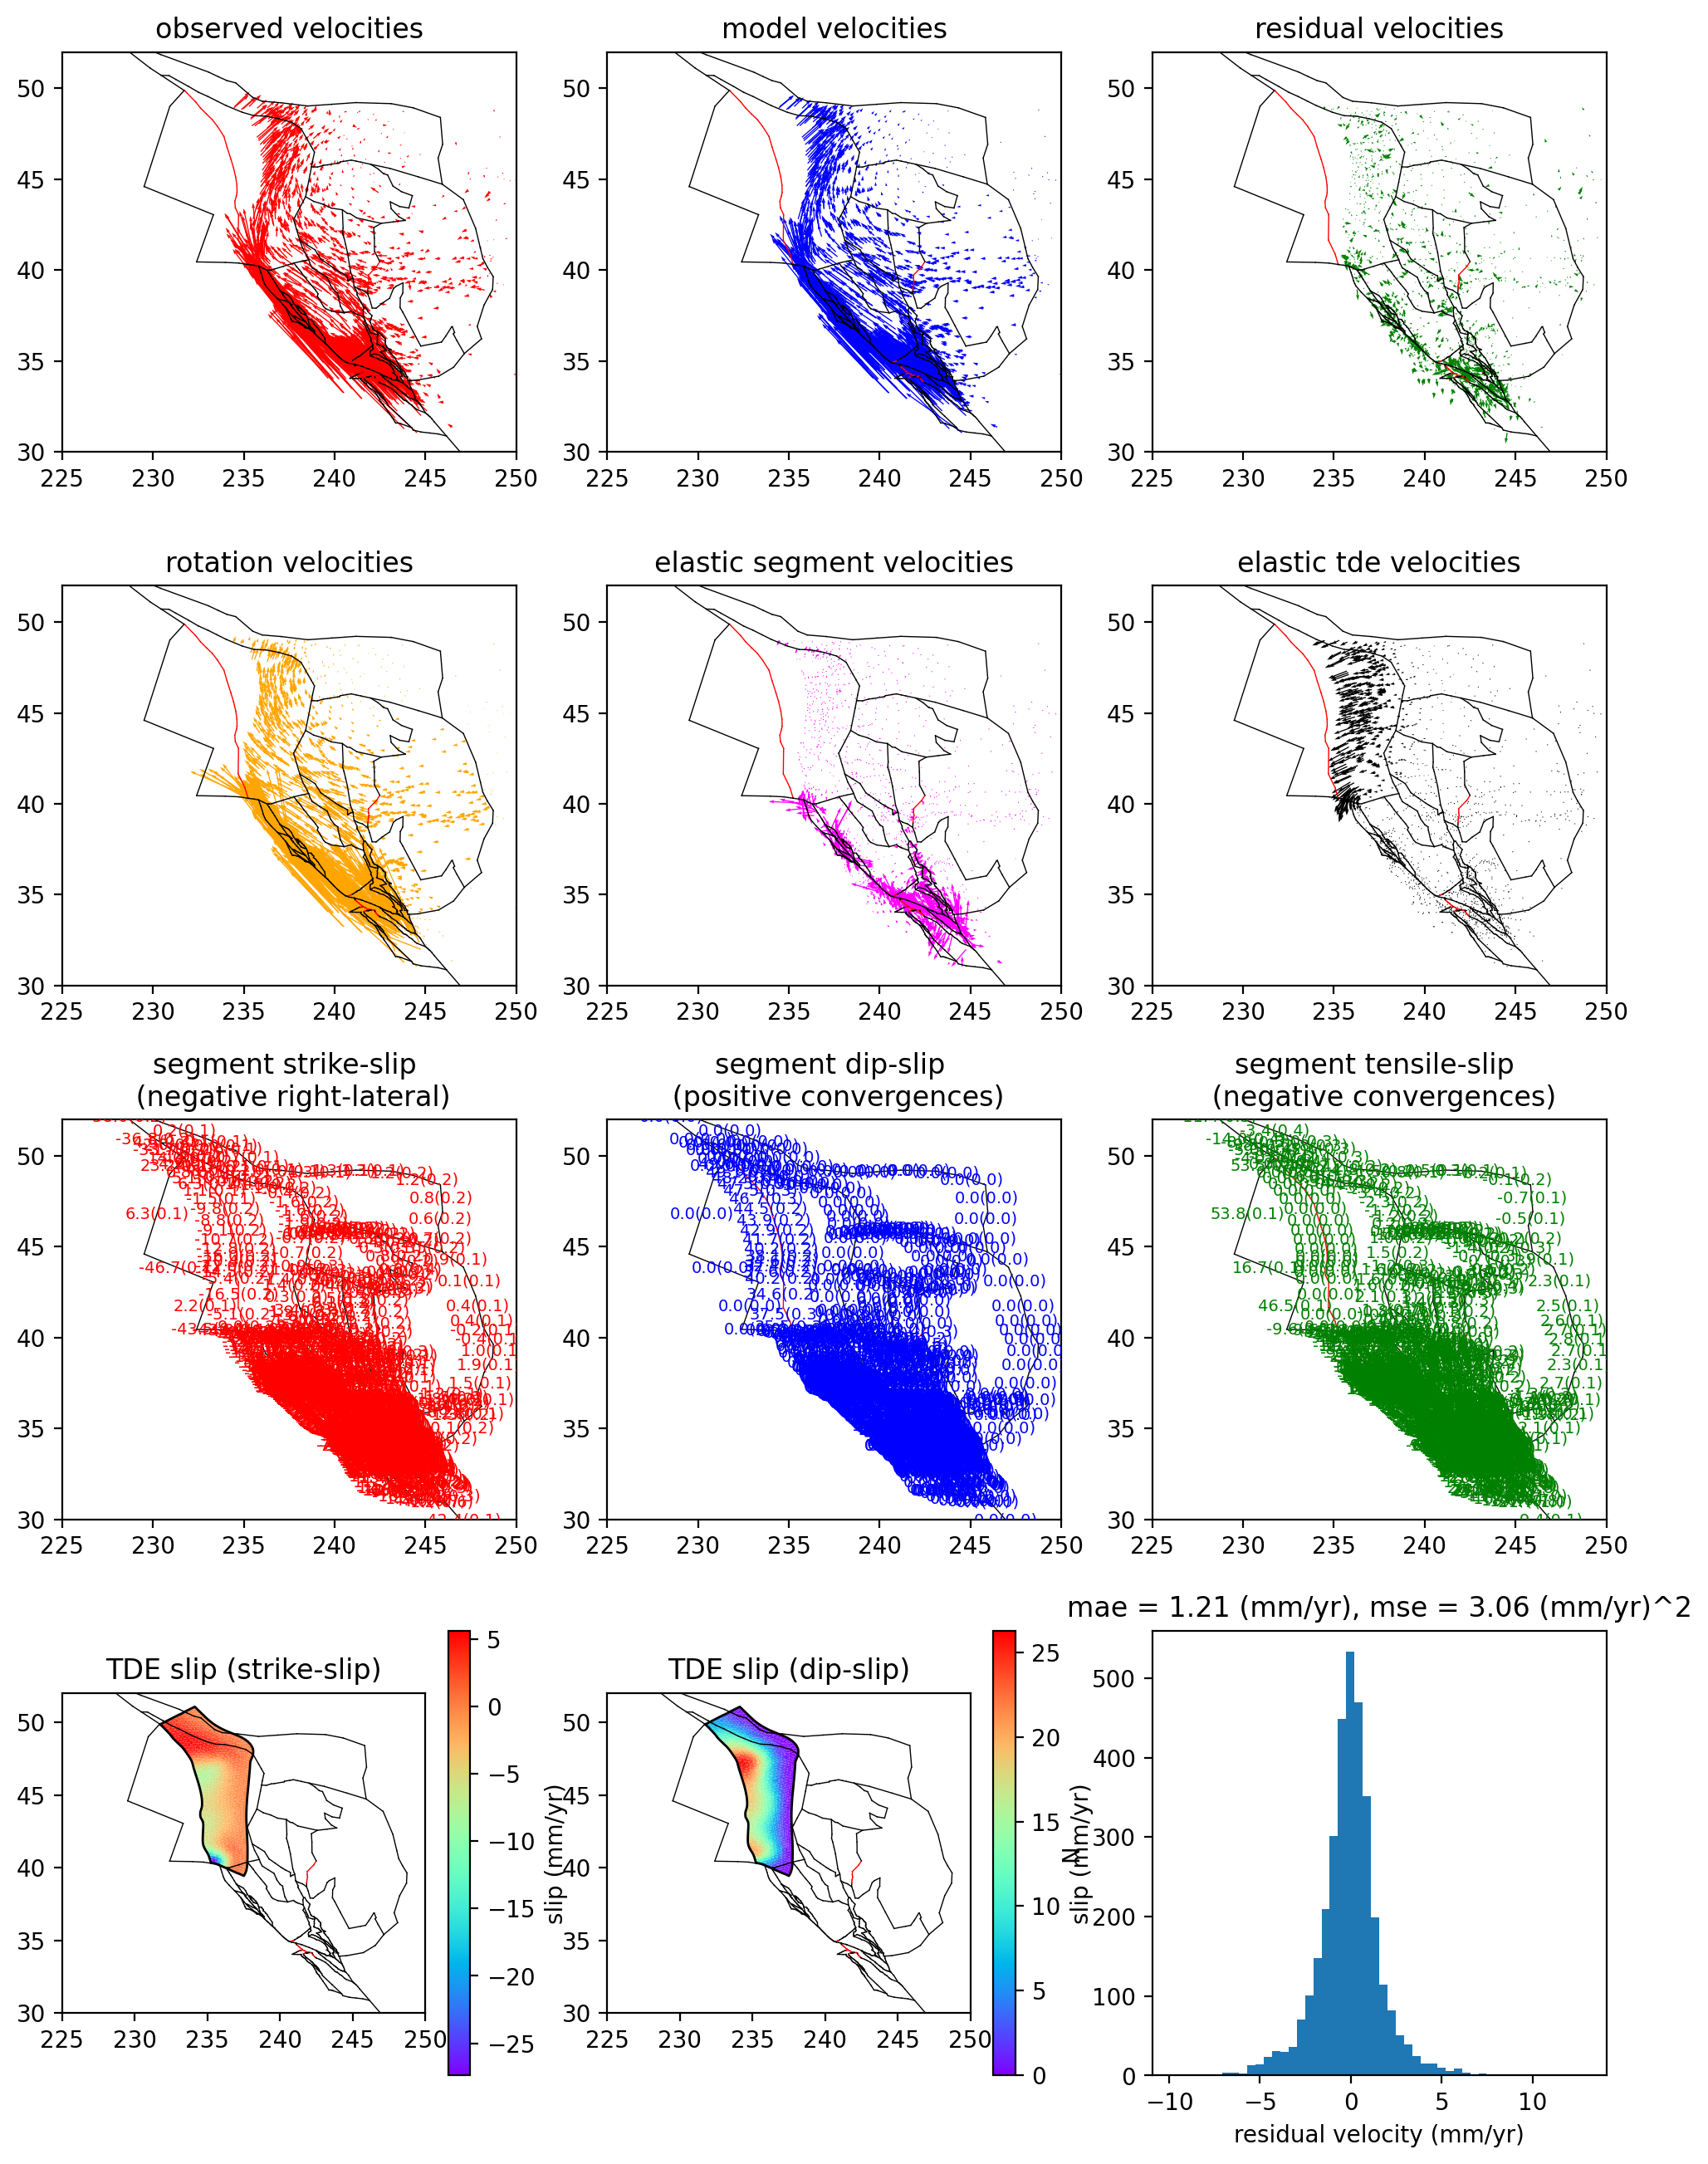

2025-07-15 16:24:27.265 | SUCCESS  | celeri.plot:plot_estimation_summary:682 - Wrote figures /Users/meade/Desktop/celeri/runs/0000000006/plot_estimation_summary.(pdf, png)


<Figure size 640x480 with 0 Axes>

In [5]:
celeri.plot_estimation_summary(estimation.model, estimation)

# Plotting functions

In [ ]:
def common_plot_elements(p, segment, lon_range, lat_range):
    """Elements common to all subplots
    Args:
        segment (pd.DataFrame): Fault segments
        lon_range (Tuple): Longitude range (min, max)
        lat_range (Tuple): Latitude range (min, max)
    """
    # TODO: seperate segment plotting from the styling
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-k",
            linewidth=p.segment_line_width_outer,
        )
    for i in range(len(segment)):
        plt.plot(
            [segment.lon1[i], segment.lon2[i]],
            [segment.lat1[i], segment.lat2[i]],
            "-w",
            linewidth=p.segment_line_width_inner,
        )

    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.xticks(p.lon_ticks)
    plt.yticks(p.lat_ticks)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("longitude (degrees)", fontsize=p.fontsize)
    plt.ylabel("latitude (degrees)", fontsize=p.fontsize)
    plt.tick_params(labelsize=p.fontsize)


def plot_geography(p, geographic_lons, geographic_lats):
    # Draw geographic information
    plt.fill(
        geographic_lons,
        geographic_lats,
        color=p.land_color,
        linewidth=p.land_linewidth,
        zorder=p.land_zorder,
    )

def plot_vel_arrows_elements(p, station, east_velocity, north_velocity, arrow_scale):
    # Draw velocity vectors
    velocity_magnitude = np.sqrt(east_velocity**2.0 + north_velocity**2.0)
    norm = Normalize()
    norm.autoscale(velocity_magnitude)
    norm.vmin = p.arrow_magnitude_min
    norm.vmax = p.arrow_magnitude_max
    colormap = p.arrow_colormap
    quiver_handle = plt.quiver(
        station.lon,
        station.lat,
        east_velocity,
        north_velocity,
        scale=p.arrow_scale_default * arrow_scale,
        width=p.arrow_width,
        scale_units="inches",
        color=colormap(norm(velocity_magnitude)),
        linewidth=p.arrow_linewidth,
        edgecolor=p.arrow_edgecolor,
    )

    # Draw white background rectangle
    rect = mpatches.Rectangle(
        p.key_rectangle_anchor,
        p.key_rectangle_width,
        p.key_rectangle_height,
        fill=True,
        color=p.key_background_color,
        linewidth=p.key_linewidth,
        ec=p.key_edgecolor,
    )
    plt.gca().add_patch(rect)

    # Draw arrow legend
    plt.quiverkey(
        quiver_handle,
        p.key_arrow_lon,
        p.key_arrow_lat,
        p.key_arrow_magnitude,
        p.key_arrow_text,
        coordinates="data",
        color=p.key_arrow_color,
        fontproperties={"size": p.fontsize},
    )

    plt.gca().set_aspect("equal")
    plt.show()

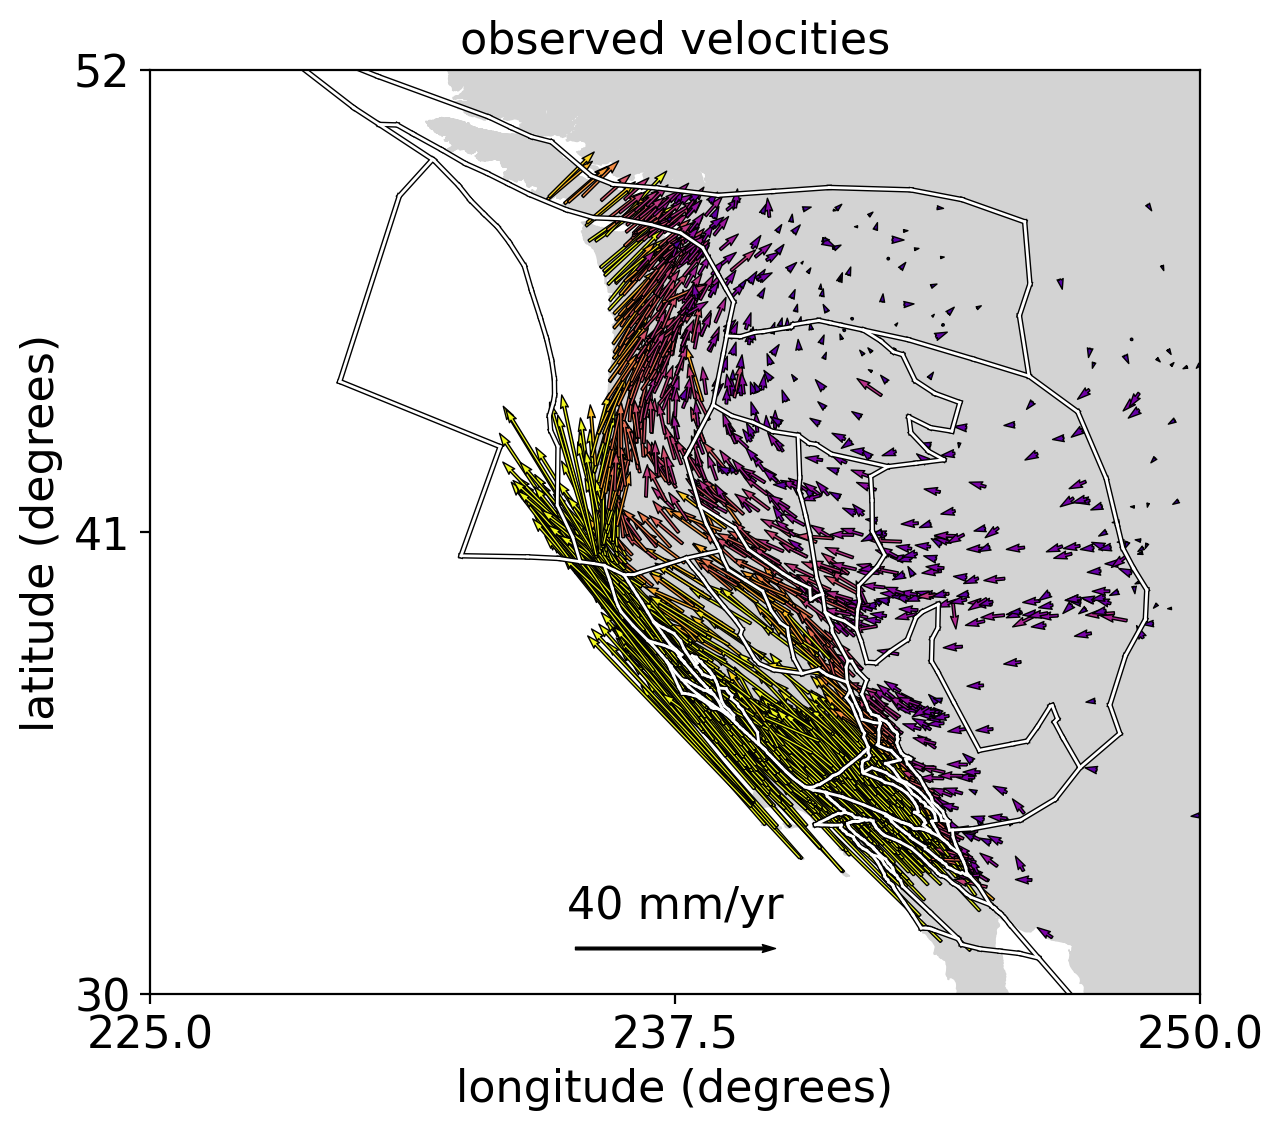

In [7]:
# Observed velocities
plt.figure(figsize=p.figsize_vectors)
plt.title("observed velocities", fontsize=p.fontsize)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)
plot_vel_arrows_elements(
    p,
    estimation.model.station,
    estimation.model.station.east_vel,
    estimation.model.station.north_vel,
    arrow_scale=1.0,
)

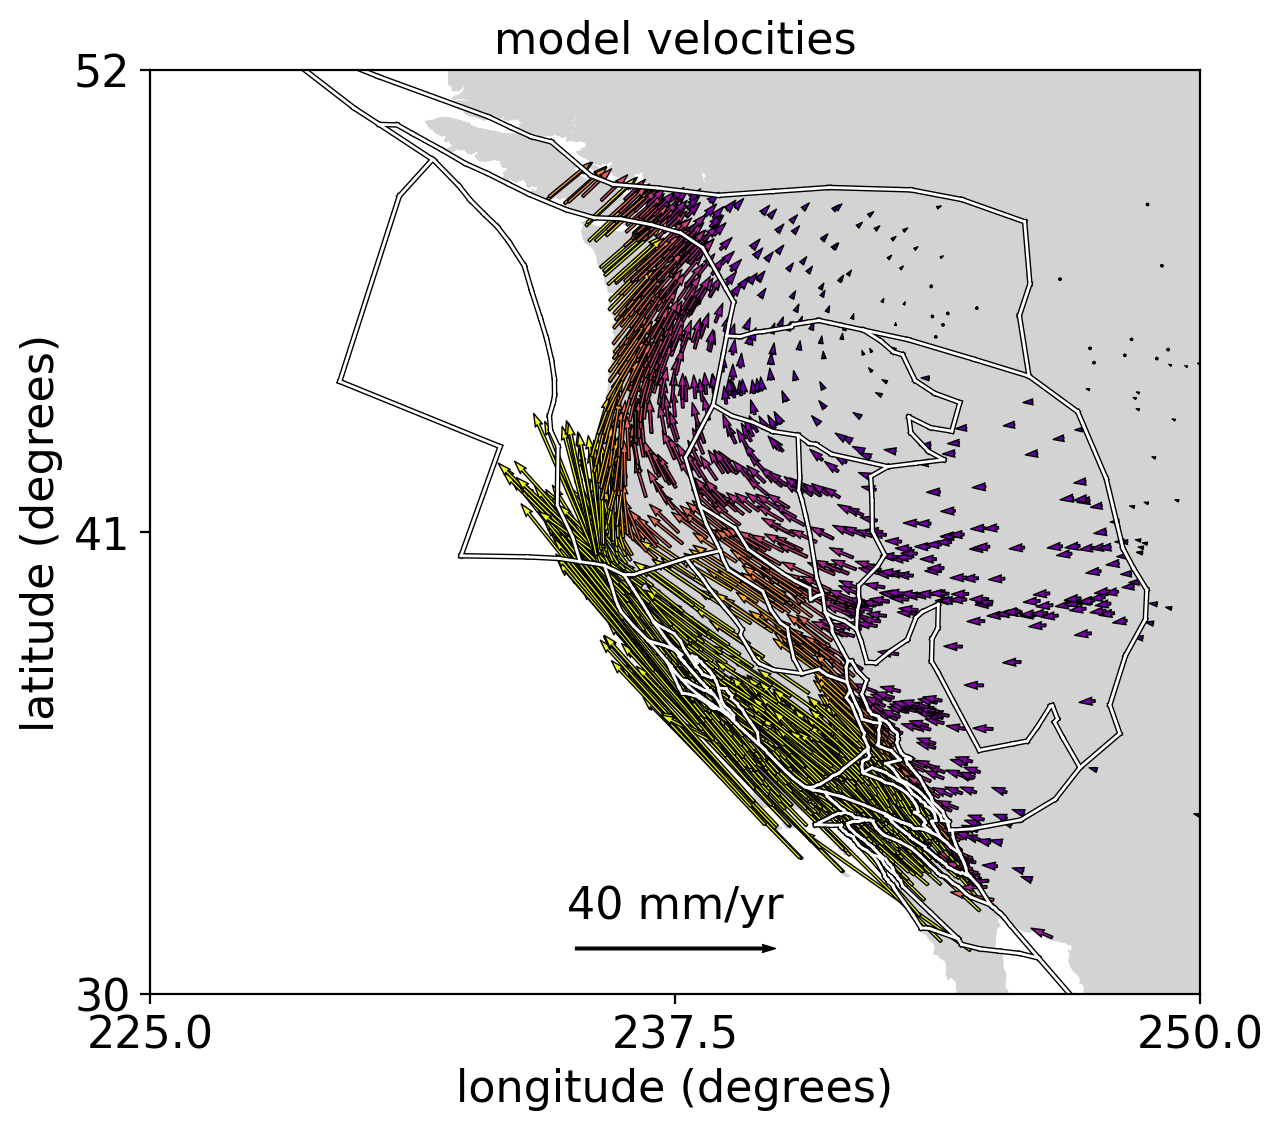

In [8]:
# Model velocities
plt.figure(figsize=p.figsize_vectors)
plt.title("model velocities", fontsize=p.fontsize)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)
plot_vel_arrows_elements(
    p,
    estimation.model.station,
    estimation.east_vel,
    estimation.north_vel,
    arrow_scale=1.0,
)

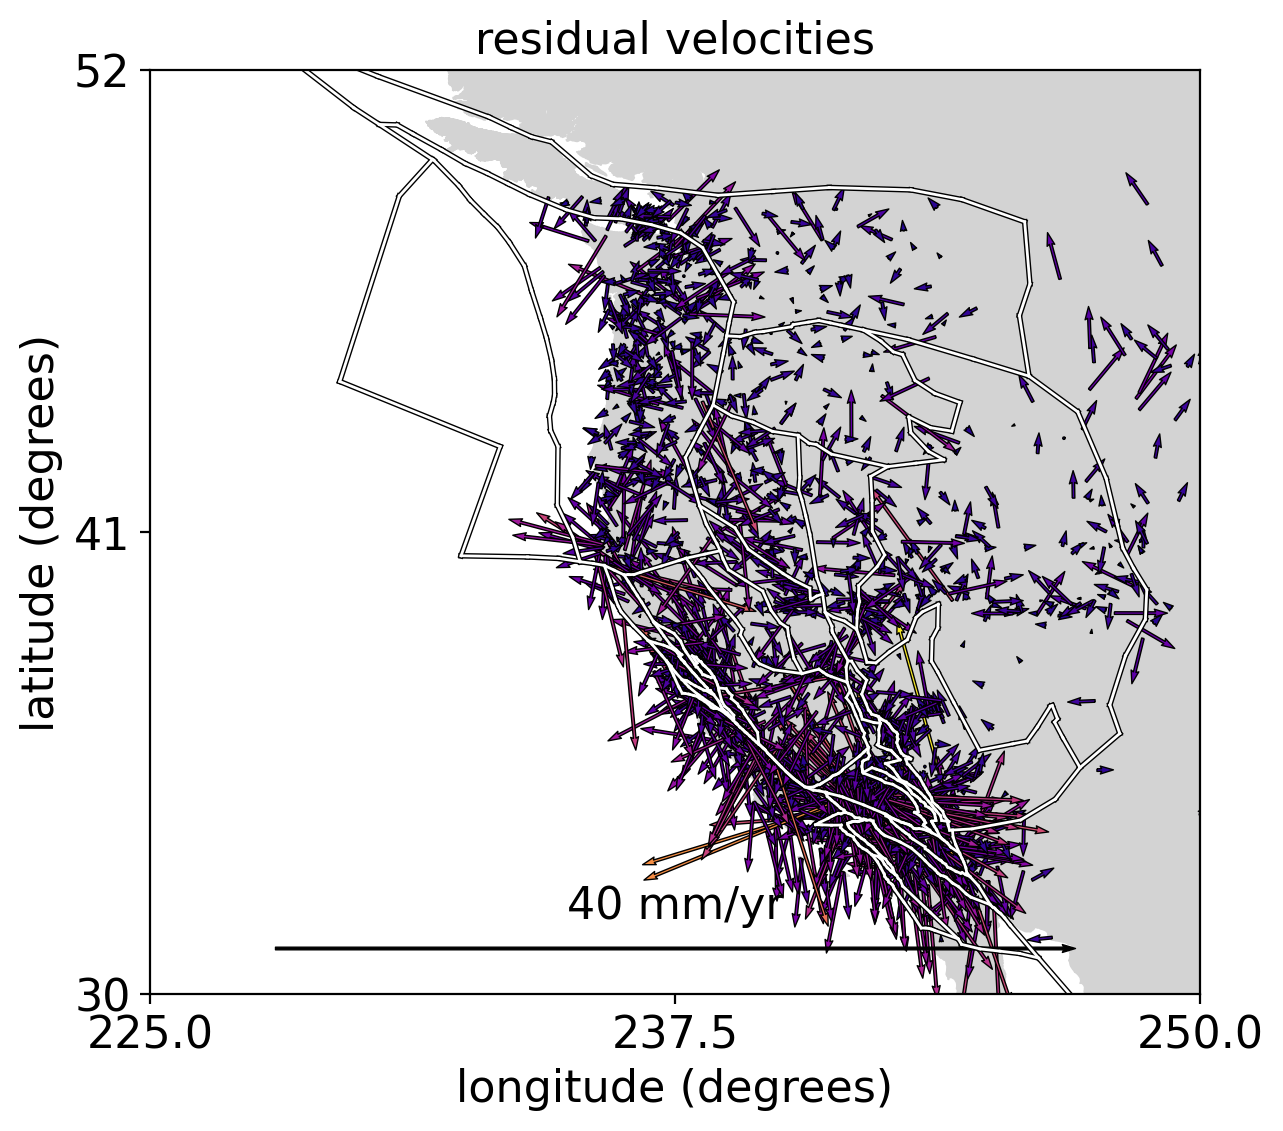

In [9]:
# Residual velocities
plt.figure(figsize=p.figsize_vectors)
plt.title("residual velocities", fontsize=p.fontsize)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)
plot_vel_arrows_elements(
    p,
    estimation.model.station,
    estimation.east_vel_residual,
    estimation.north_vel_residual,
    arrow_scale=0.25,
)

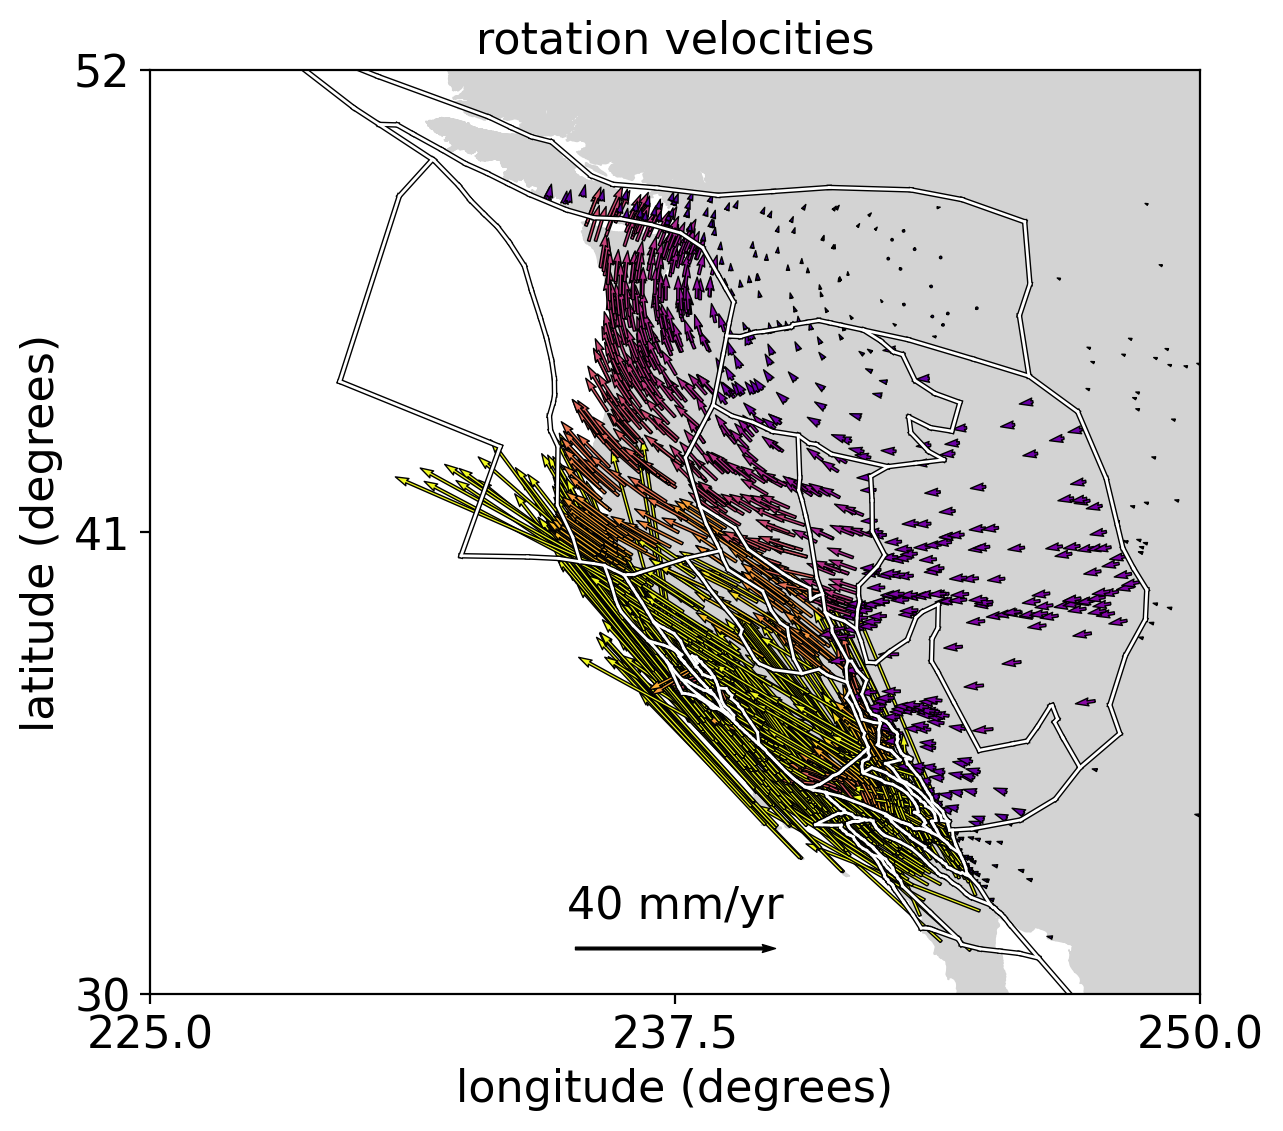

In [10]:
# Rotation velocities
plt.figure(figsize=p.figsize_vectors)
plt.title("rotation velocities", fontsize=p.fontsize)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)
plot_vel_arrows_elements(
    p,
    estimation.model.station,
    estimation.east_vel_rotation,
    estimation.north_vel_rotation,
    arrow_scale=1.0,
)

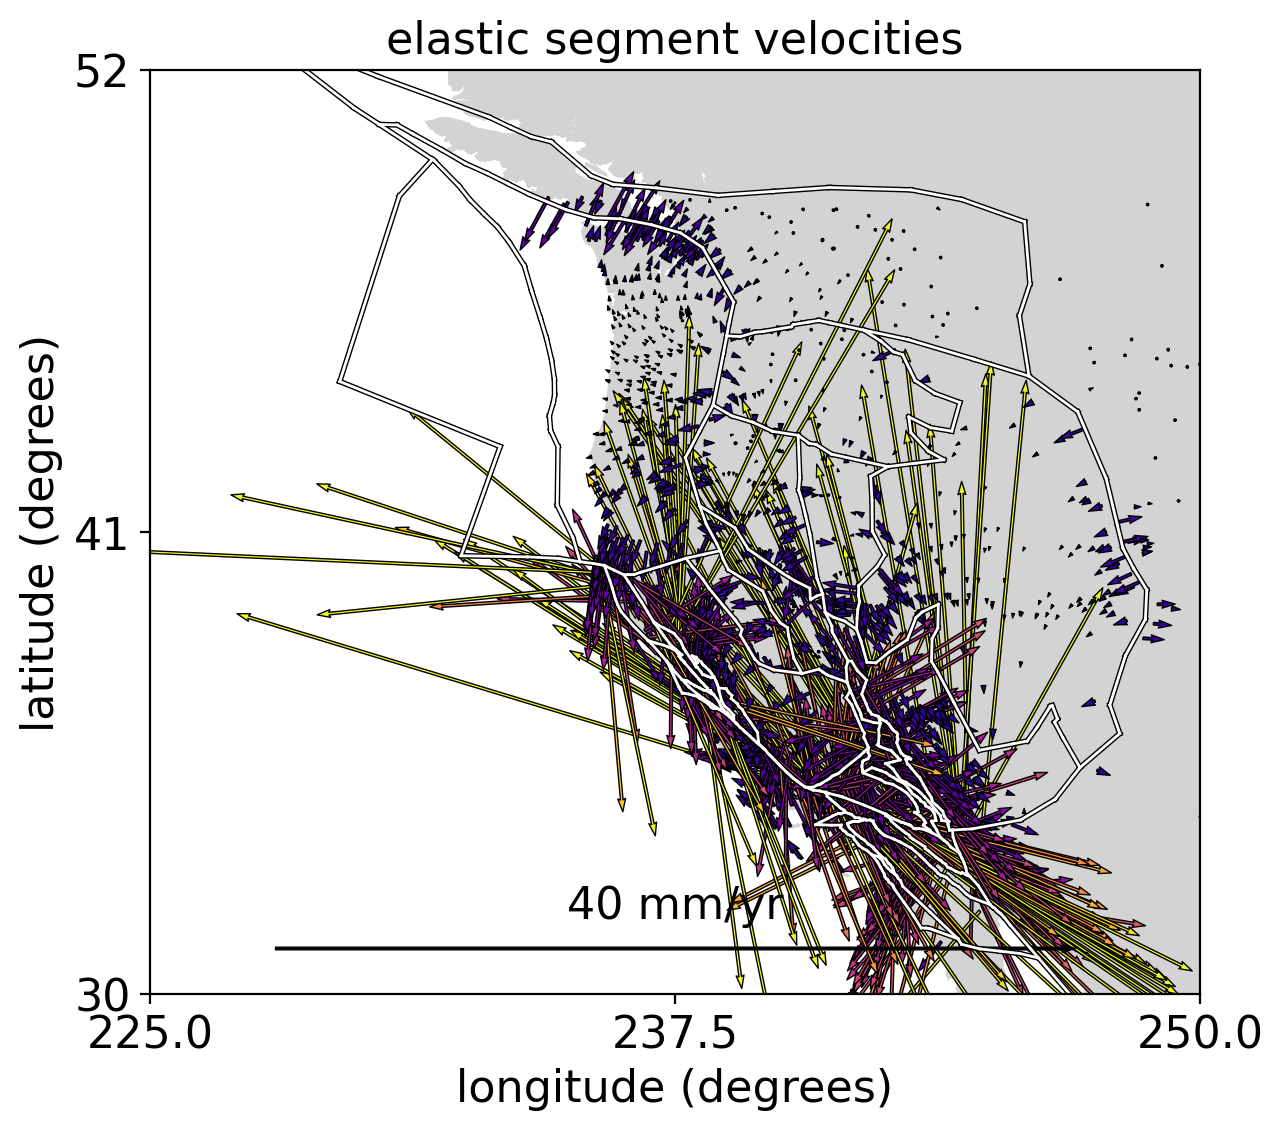

In [11]:
# Elastic segment velocities
plt.figure(figsize=p.figsize_vectors)
plt.title("elastic segment velocities", fontsize=p.fontsize)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)
plot_vel_arrows_elements(
    p,
    estimation.model.station,
    estimation.east_vel_elastic_segment,
    estimation.north_vel_elastic_segment,
    arrow_scale=0.25,
)

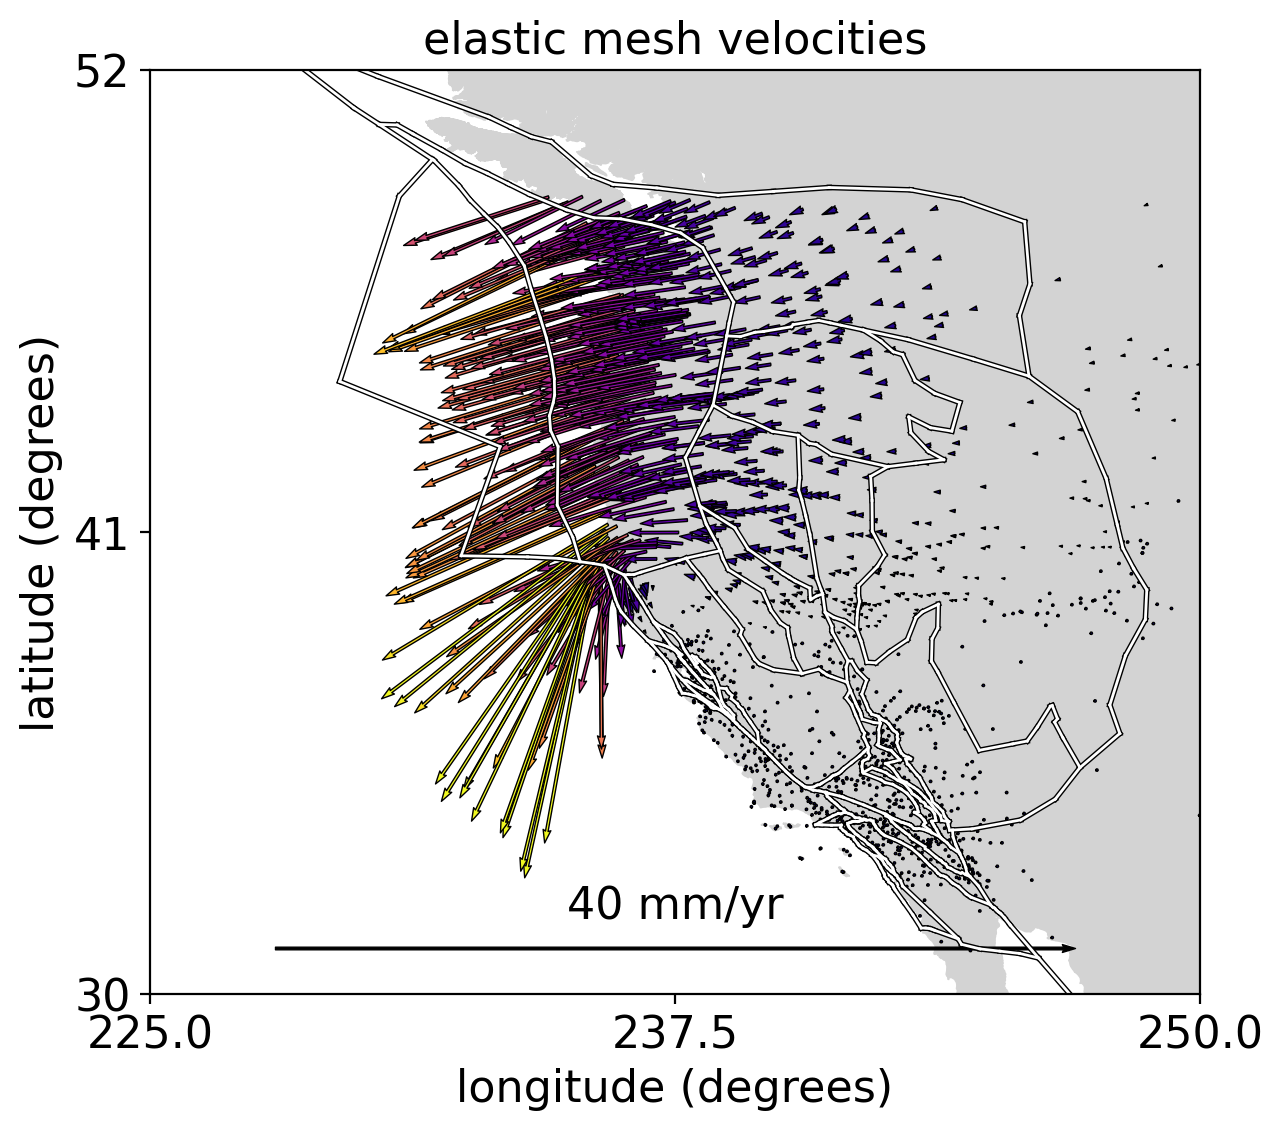

In [12]:
# Elastic tde velocities
plt.figure(figsize=p.figsize_vectors)
plt.title("elastic mesh velocities", fontsize=p.fontsize)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)
plot_vel_arrows_elements(
    p,
    estimation.model.station,
    estimation.east_vel_tde,
    estimation.north_vel_tde,
    arrow_scale=0.25,
)

# Residual velocity histogram

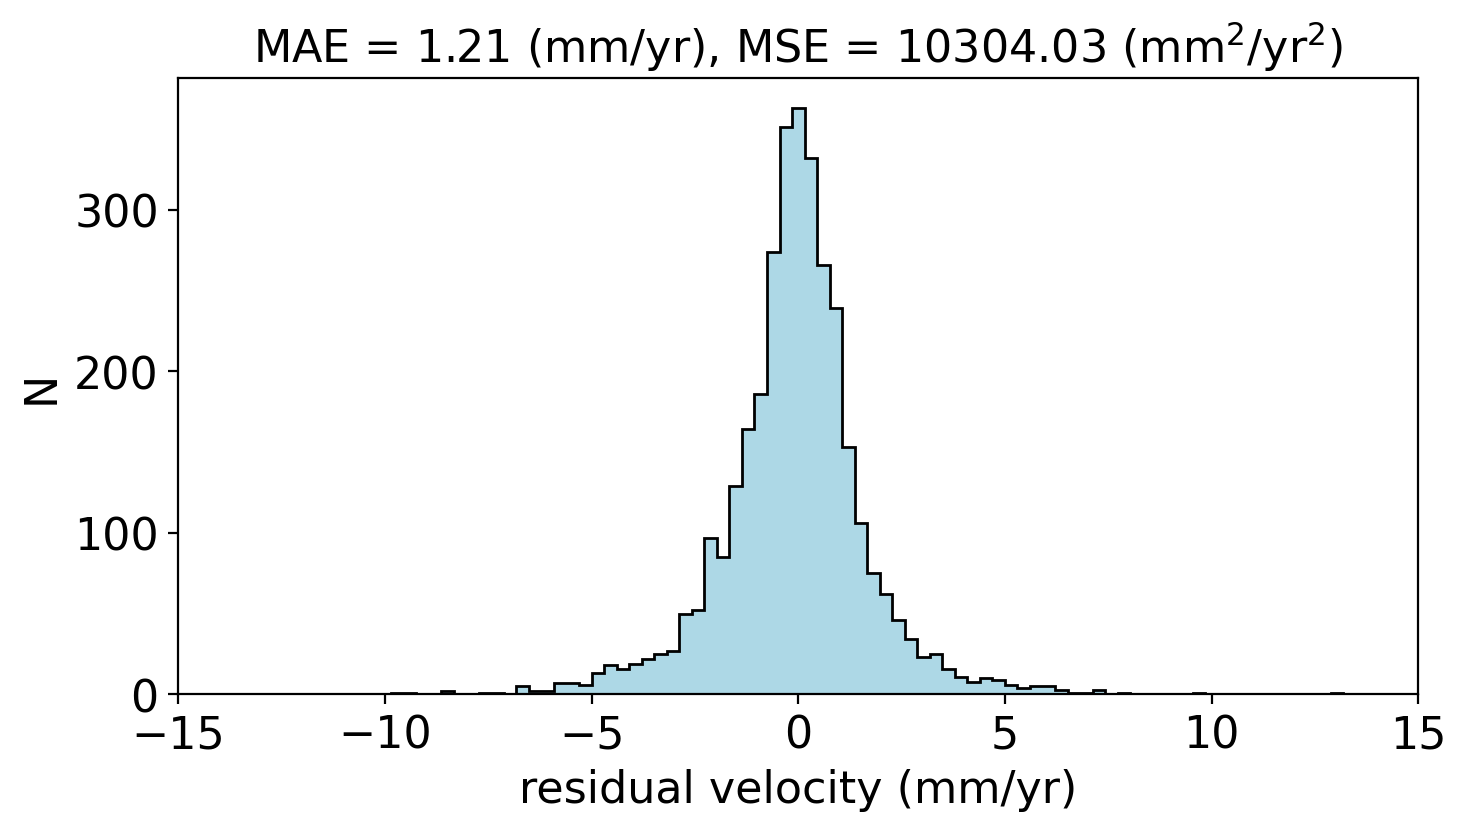

In [13]:
# Residual velocities
residual_velocity_vector = np.concatenate(
    (estimation.east_vel_residual, estimation.north_vel_residual)
)
mean_average_error = np.mean(np.abs(residual_velocity_vector))
mean_squared_error = np.sum(residual_velocity_vector **2.0)

# Histogram parameters
n_bins = 100
bin_edge_min = -15
bin_edge_max = 15
bins = np.linspace(bin_edge_min, bin_edge_max, n_bins)

# Create histogram of residual velocities
plt.figure(figsize=(8, 4))
plt.hist(
    residual_velocity_vector,
    bins,
    histtype="stepfilled",
    color="lightblue",
    edgecolor="k",
)
plt.xlim([bin_edge_min, bin_edge_max])
plt.xlabel("residual velocity (mm/yr)", fontsize=p.fontsize)
plt.ylabel("N", fontsize=p.fontsize)
plt.title(f"MAE = {mean_average_error:.2f} (mm/yr), MSE = {mean_squared_error:.2f} (mm$^2$/yr$^2$)", fontsize=p.fontsize)
plt.tick_params(labelsize=p.fontsize)
plt.show()

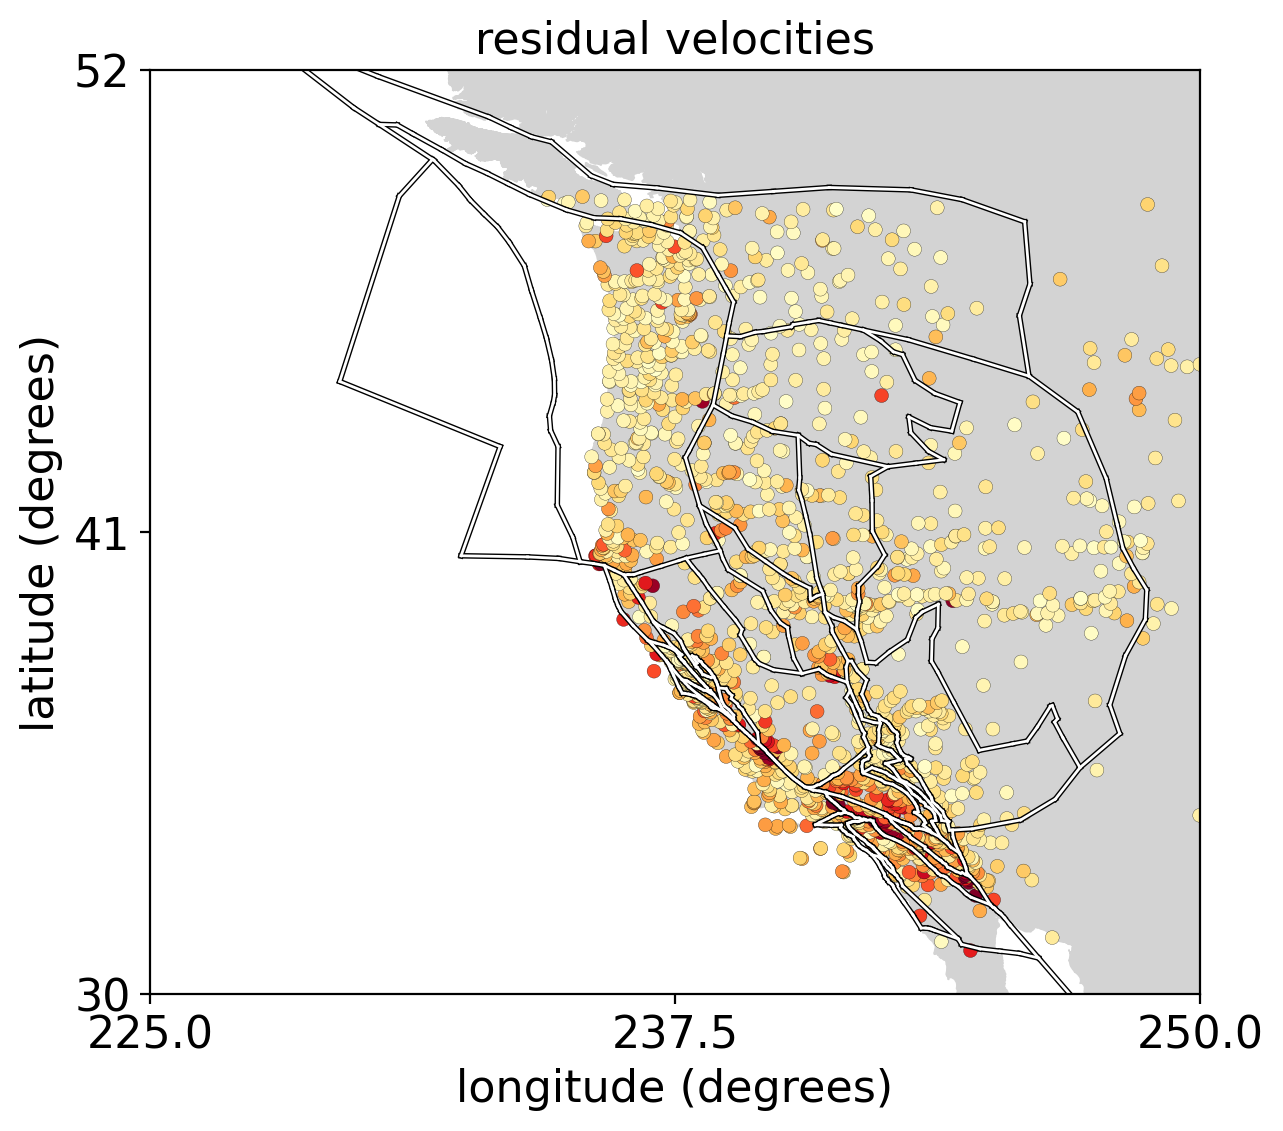

In [14]:
# Scatter plot for velocity estimate errors
mae_station = np.abs(estimation.east_vel_residual) + np.abs(
    estimation.north_vel_residual
)
fig = plt.figure(figsize=p.figsize_vectors)
plt.title("residual velocities", fontsize=16)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)

# Residual velocity mean average error
plt.scatter(
    estimation.model.station.lon,
    estimation.model.station.lat,
    s=25,
    edgecolors="k",
    c=mae_station,
    cmap="YlOrRd",
    linewidths=0.1,
)
plt.clim(0, 10)

# Draw white background rectangle
rect = mpatches.Rectangle(
    p.key_rectangle_anchor,
    p.key_rectangle_width,
    p.key_rectangle_height,
    fill=True,
    color=p.key_background_color,
    linewidth=p.key_linewidth,
    ec=p.key_edgecolor,
)
plt.gca().add_patch(rect)
plt.show()

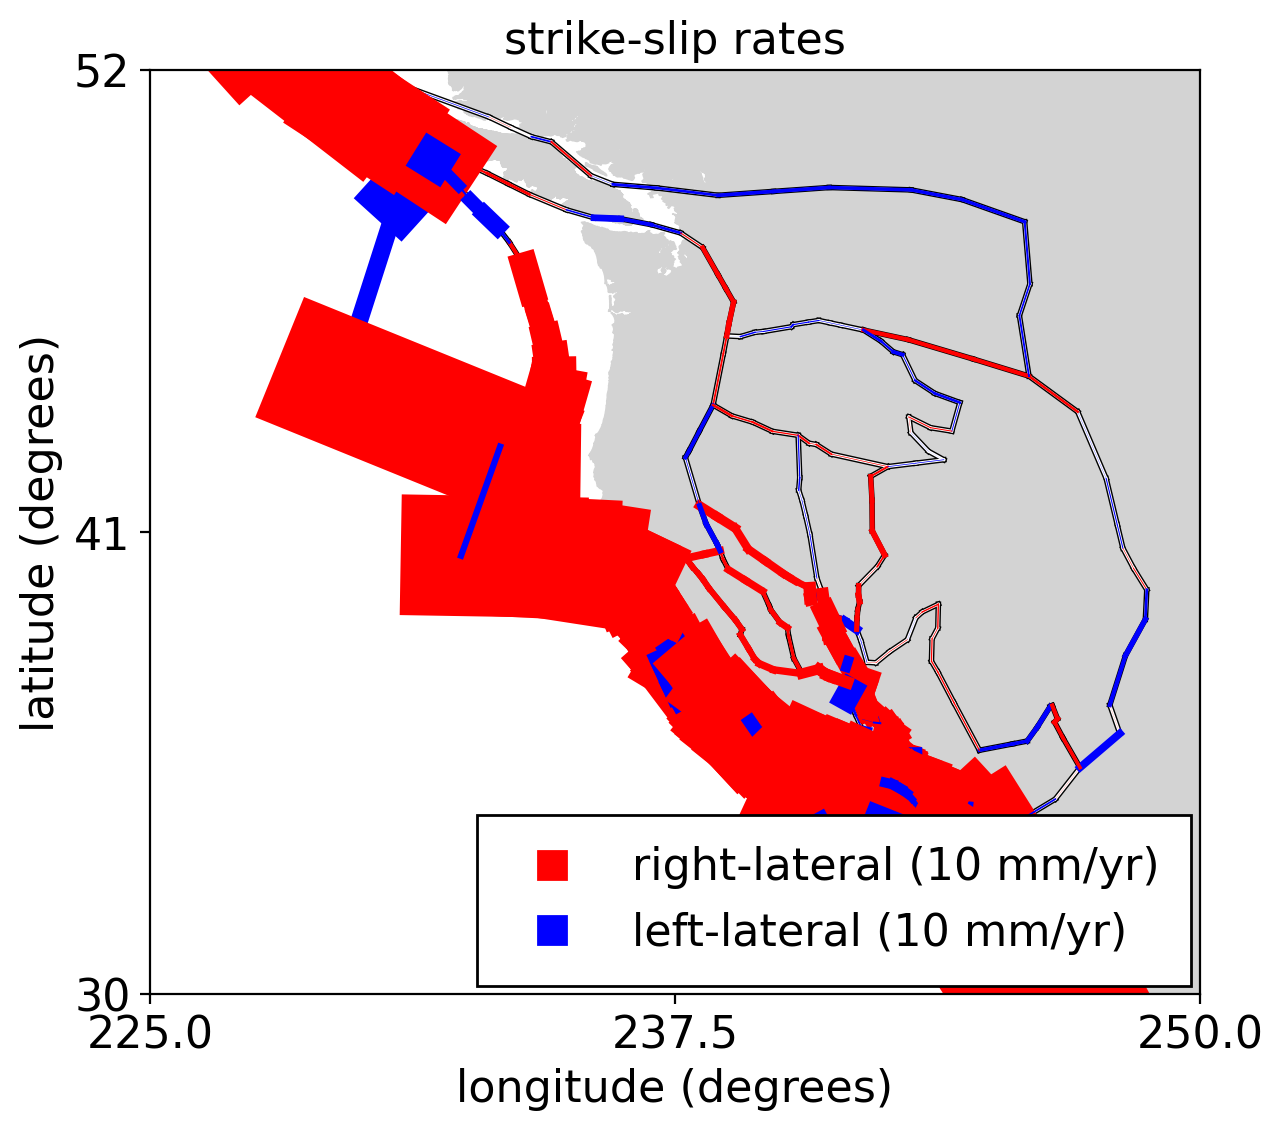

In [ ]:
# Plot estimated strike-slip rates
plt.figure(figsize=p.figsize_vectors)
plt.title("strike-slip rates", fontsize=p.fontsize)
common_plot_elements(p, estimation.model.segment, p.lon_range, p.lat_range)
plot_geography(p, geographic_lons, geographic_lats)

# Plot fault slip rates
for i in range(len(estimation.model.segment)):
    if estimation.strike_slip_rates[i] < 0:
        plt.plot(
            [estimation.model.segment.lon1[i], estimation.model.segment.lon2[i]],
            [estimation.model.segment.lat1[i], estimation.model.segment.lat2[i]],
            "-r",
            linewidth=estimation.strike_slip_rates[i],
        )
    else:
        plt.plot(
            [estimation.model.segment.lon1[i], estimation.model.segment.lon2[i]],
            [estimation.model.segment.lat1[i], estimation.model.segment.lat2[i]],
            "-b",
            linewidth=estimation.strike_slip_rates[i],
        )

# Legend
blue_segments = mlines.Line2D(
    [],
    [],
    color="red",
    marker="s",
    linestyle="None",
    markersize=10,
    label="right-lateral (10 mm/yr)",
)
red_segments = mlines.Line2D(
    [],
    [],
    color="blue",
    marker="s",
    linestyle="None",
    markersize=10,
    label="left-lateral (10 mm/yr)",
)
plt.legend(
    handles=[blue_segments, red_segments],
    loc="lower right",
    fontsize=p.fontsize,
    framealpha=1.0,
    edgecolor="k",
).get_frame().set_boxstyle("Square")

In [16]:
# Plot estimated strike-slip rates
plt.figure(figsize=figsize_vectors)
plt.title("dip-slip/tensile-slip rates", fontsize=fontsize)
common_plot_elements(model.segment, lon_range, lat_range)

plt.fill(
    world_boundaries["lon"],
    world_boundaries["lat"],
    color=land_color,
    linewidth=land_linewidth,
    zorder=land_zorder,
)

for i in range(len(model.segment)):
    if estimation.dip_slip_rates[i] > 0:
        plt.plot(
            [model.segment.lon1[i], model.segment.lon2[i]],
            [model.segment.lat1[i], model.segment.lat2[i]],
            "-r",
            linewidth=estimation.dip_slip_rates[i],
        )
    else:
        plt.plot(
            [model.segment.lon1[i], model.segment.lon2[i]],
            [model.segment.lat1[i], model.segment.lat2[i]],
            "-b",
            linewidth=estimation.dip_slip_rates[i],
        )

for i in range(len(model.segment)):
    if estimation.tensile_slip_rates[i] < 0:
        plt.plot(
            [model.segment.lon1[i], model.segment.lon2[i]],
            [model.segment.lat1[i], model.segment.lat2[i]],
            "-r",
            linewidth=estimation.tensile_slip_rates[i],
        )
    else:
        plt.plot(
            [model.segment.lon1[i], model.segment.lon2[i]],
            [model.segment.lat1[i], model.segment.lat2[i]],
            "-b",
            linewidth=estimation.tensile_slip_rates[i],
        )


# Legend
black_segments = mlines.Line2D(
    [],
    [],
    color="red",
    marker="s",
    linestyle="None",
    markersize=10,
    label="convergence (10 mm/yr)",
)
red_segments = mlines.Line2D(
    [],
    [],
    color="blue",
    marker="s",
    linestyle="None",
    markersize=10,
    label="extension (10 mm/yr)",
)
plt.legend(
    handles=[black_segments, red_segments],
    loc="lower right",
    fontsize=fontsize,
    framealpha=1.0,
    edgecolor="k",
).get_frame().set_boxstyle("Square")

NameError: name 'figsize_vectors' is not defined